# Ejercicio 3: Red de Mark Newman

In [1]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import os
from scipy import stats
#import igraph 
#from igraph import statistics


In [2]:
# Leemos el archivo
myFolder = (os.getcwd()+'/tc01_data/') # busca en el directorio actual

# Primero creamos la red de sistemas de internet
mysystems = nx.read_gml(myFolder+'as-22july06.gml')

N = mysystems.number_of_nodes()
E = mysystems.number_of_edges()

print ('Numero de nodos {}'.format(N))
print ('Numero de enlaces {}'.format(E))
print ('Dirigida: {}'.format(nx.is_directed(mysystems)))

# es no dirigida con lo cual solo hay que ver el numero de vecinos sin preocuparse si son in o out.

Numero de nodos 22963
Numero de enlaces 48436
Dirigida: False


## Análisis gráfico
Bineado lineal con distintas escalas

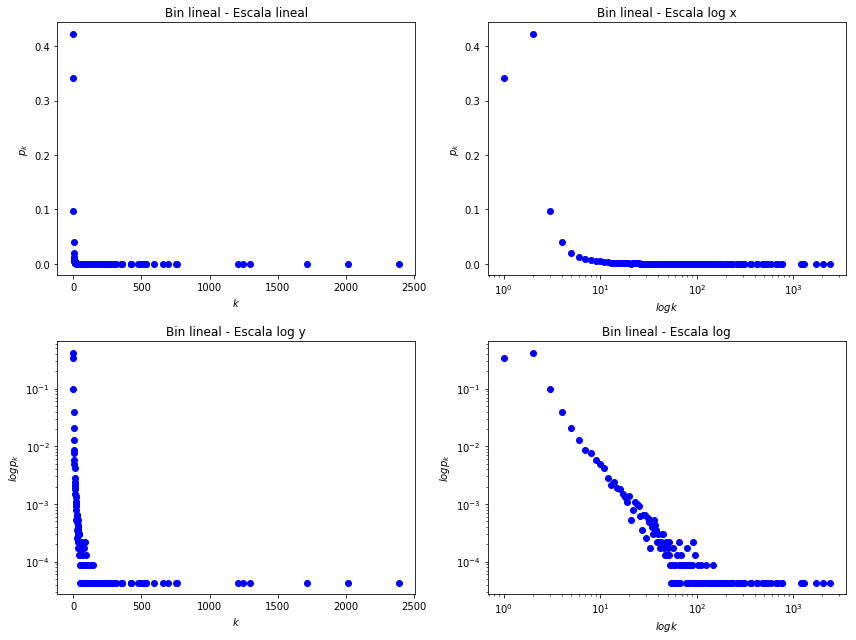

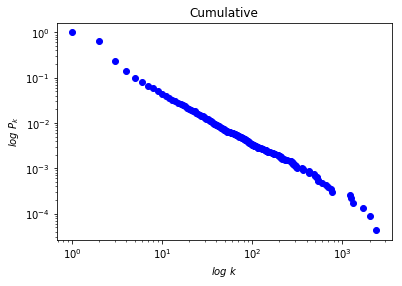

In [7]:
# Armamos una lista con el numero de vecinos de cada nodo:
nodos = list(mysystems.nodes)
kgrados = [mysystems.degree(nodo) for nodo in nodos]

# Contamos la cantidad de nodos que tienen un cierto k_grado, usando la funcion np.unique()
# Guardamos el resultado en la variable histograma
histograma = np.unique(kgrados,return_counts=True)
k = histograma[0] # grados
pk = histograma[1]/float(N) # pk = Nk/N, donde N es el numero total de nodos (cuentas normalizadas)

#1) Escala Lineal
plt.figure(figsize=(12,9))
plt.subplot(2, 2, 1)
plt.plot(k,pk,'bo')
plt.xlabel('$k$')
plt.ylabel('$p_{k}$')
plt.title('Bin lineal - Escala lineal')

#2) Escala logaritmica en x
plt.subplot(2, 2, 2)
plt.plot(k,pk,'bo')
plt.xscale('log')
plt.xlabel('$log k$')
plt.ylabel('$p_{k}$')
plt.title('Bin lineal - Escala log x')

#3) Escala logaritmica en y
plt.subplot(2, 2, 3)
plt.plot(k,pk,'bo')
plt.yscale('log')
plt.xlabel('$k$')
plt.ylabel('$log p_{k}$')
plt.title('Bin lineal - Escala log y')

#4) Escala logaritmica en ambos ejes
plt.subplot(2, 2, 4)
plt.plot(k,pk,'bo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$log k$')
plt.ylabel('$log p_{k}$')
plt.title('Bin lineal - Escala log')

plt.tight_layout()
plt.show()

#5) Cumulative
Pk=[]
for grado in k:
    suma = sum(pk[int(np.where(k==grado)[0]) :])
    Pk.append(suma)

plt.figure(2)
plt.plot(k,Pk,'bo')
plt.xlabel('$log$ $k$')
plt.xscale('log')
plt.ylabel('$log$ $P_{k}$')
plt.yscale('log')
plt.title('Cumulative')
plt.show()


Bineado logaritmico

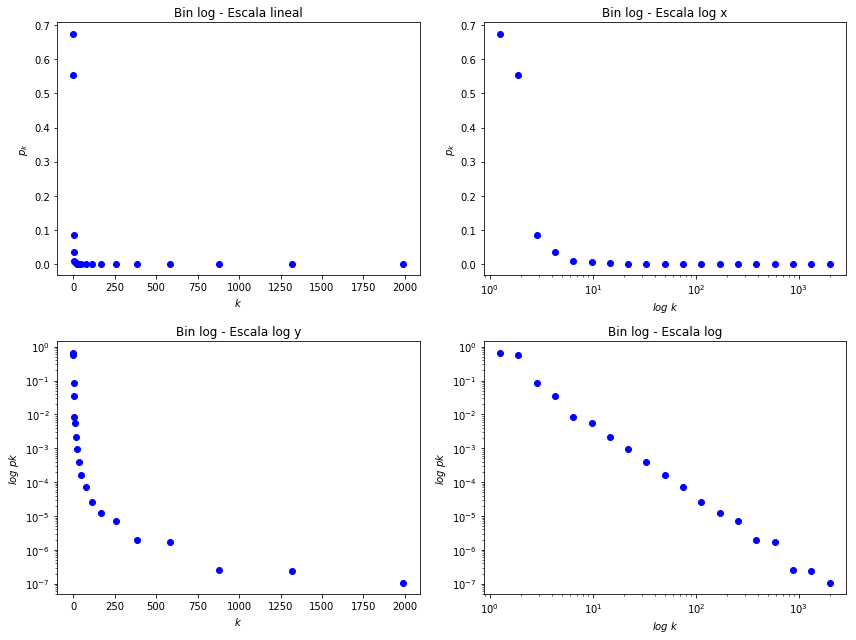

Power-law Exponente: -2.087157


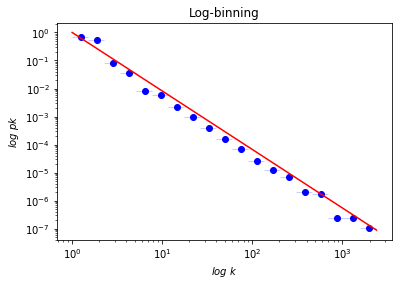

In [20]:
maxgrado = max(k) #maximo grado

logbin = np.logspace(0,np.log10(maxgrado),num=20,endpoint=True,base=10) # bineado en base 10

histograma_logbin = np.histogram(kgrados,bins=logbin,density=False)
# Nota: al no ponerle density=True, no lo normaliza. Lo hacemos asi para hacer nosotros
# la cuenta de normalizacion dividiendo por el ancho del bin. Luego comparamos con el histo
# normalizado y veamos que los puntos nos caigan bien

# Normalizamos por el ancho de los bines y creamos el vector bin_centros
bin_centros = []
pk_logbin = []

for i in range(len(logbin)-1):
    bin_centros.append((logbin[i+1]+logbin[i])/2)
    bin_ancho = logbin[i+1]-logbin[i]
    pk_logbin.append(histograma_logbin[0][i]/(bin_ancho*N)) #normalizamos por el ancho del bin y por el numero total de nodos


# Graficos
plt.figure(figsize=(12,9))
plt.subplot(2, 2, 1)
plt.plot(bin_centros,pk_logbin,'bo')
plt.xlabel('$k$')
plt.ylabel('$p_k$')
plt.title('Bin log - Escala lineal')

plt.subplot(2, 2, 2)
plt.plot(bin_centros,pk_logbin,'bo')
plt.xlabel('$log$ $k$')
plt.xscale('log')
plt.ylabel('$p_k$')
plt.title('Bin log - Escala log x')

plt.subplot(2, 2, 3)
plt.plot(bin_centros,pk_logbin,'bo')
plt.xlabel('$k$')
plt.ylabel('$log$ $pk$')
plt.yscale('log')
plt.title('Bin log - Escala log y')

plt.subplot(2, 2, 4)
plt.plot(bin_centros,pk_logbin,'bo')
plt.xlabel('$log$ $k$')
plt.xscale('log')
plt.ylabel('$log$ $pk$')
plt.yscale('log')
plt.title('Bin log - Escala log')

plt.tight_layout()
plt.show()


# histograma normalizado vs nuestra cuenta, para chequear que lo hicimos bien 
plt.figure(2)
plt.plot(bin_centros,pk_logbin,'bo')
plt.hist(kgrados,bins=logbin,normed=True,stacked=True,edgecolor='blue',color = "skyblue",alpha=0.2)
plt.xlabel('$log$ $k$')
plt.xscale('log')
plt.ylabel('$log$ $pk$')
plt.yscale('log')
plt.title('Log-binning')

#Parametros:
alpha=-2.087157 #el que nos da la funcion power_law_fit como exponente 
print ('Power-law Exponente: {}'.format(alpha))
ksat= 5.0  #el que no da la funcino power_law_fit y figura como cutoff
kcut=max(k)     #es el mayor grado que aparece en la red

#grafico el power law
x=np.linspace(1,max(k),2000)
plt.plot(x,x**(alpha),'r')
plt.show()
